In [70]:
import sklearn as skl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [36]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [37]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [38]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [39]:
housing.shape

(20640, 10)

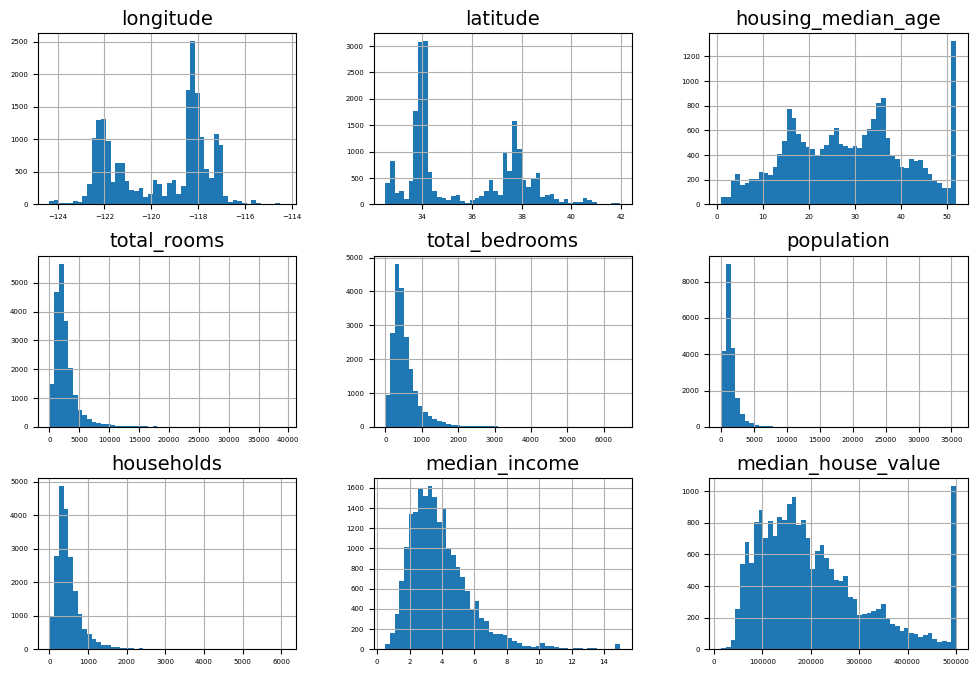

In [75]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=5)
plt.rc('ytick', labelsize=5)

housing.hist(bins=50, figsize=(12, 8))
plt.show()

# StratifiedShuffleSplit :
 - used to return splits for the dataset, where we use strata based splits.
   Making sure the data itself does not get split with irregularitires
   *eg:100ppl dataset where 5% is sick and 95% is normal may be split into all normal by train_test_split.*
   here  

In [47]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25,random_state=42)
for train_index , test_index in split.split(housing,housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
strat_test_set["income_cat"].value_counts()/len(strat_test_set)
strat_test_set.head()
# len(housing.shape)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5084,-121.53,38.60,25.0,5154.0,1105.0,3196.0,1073.0,2.7566,80200.0,INLAND,2
18325,-117.19,34.06,21.0,6107.0,1559.0,2805.0,1444.0,2.5643,102700.0,INLAND,2
676,-120.48,34.70,26.0,3069.0,518.0,1524.0,539.0,4.3162,136400.0,NEAR OCEAN,3
6178,-117.95,33.63,27.0,891.0,183.0,513.0,171.0,6.0000,381500.0,<1H OCEAN,4
19128,-121.24,37.82,9.0,6169.0,959.0,3378.0,945.0,5.1047,157900.0,INLAND,4


In [48]:
for set_ in(strat_train_set,strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2787,-118.34,34.10,24.0,1996.0,791.0,1215.0,672.0,1.5429,325000.0,<1H OCEAN
8717,-119.81,36.73,51.0,956.0,196.0,662.0,180.0,2.1010,56700.0,INLAND
3521,-122.14,37.47,37.0,3373.0,815.0,2909.0,705.0,2.8868,156600.0,NEAR BAY
16026,-116.89,33.48,14.0,1016.0,219.0,443.0,169.0,2.8071,137500.0,INLAND
19572,-120.49,37.31,45.0,1834.0,421.0,1405.0,407.0,2.0521,72400.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11930,-122.25,37.83,52.0,4190.0,1105.0,1786.0,1037.0,3.0897,234100.0,NEAR BAY
9389,-118.41,34.29,32.0,1591.0,320.0,1818.0,306.0,4.2969,145800.0,<1H OCEAN
17697,-122.47,37.78,52.0,1941.0,436.0,955.0,425.0,4.1339,396400.0,NEAR BAY
3469,-117.89,34.14,15.0,4644.0,967.0,2855.0,867.0,3.3654,222100.0,<1H OCEAN


#### The train test split ranomises the indices as well, making sure there's no sequence of the input that's being tested upon

X_test.shape
X_train.shape

In [44]:
train_test_split?

Object `train_test_split` not found.


In [45]:
housing["income_cat"] = pd.cut(housing["median_income"],bins=[0,1.5,3.0,4.5,6.,np.inf], labels=[1,2,3,4,5])

<Axes: >

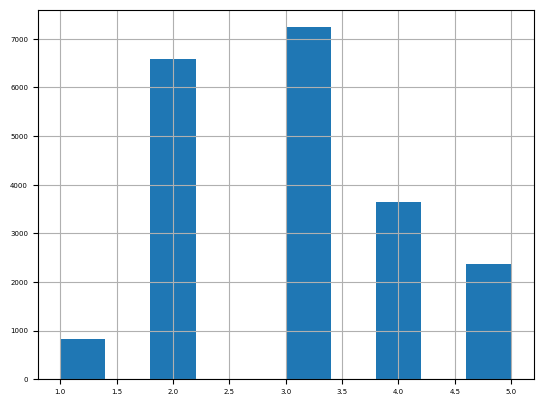

In [46]:
housing["income_cat"].hist()

## constants:
    
### i.e the radius of the circle
- s = population of each district ### i.e the radius of the circle

- c = labelled color for it, blue (low vals), red (high vals)

- alpha = btw 0 and 1, im assuming changes the opacity making overlaps more visible

- cmap = predefinde colour map, "jet", that creates the colours blue and red

In [ ]:
hosuing = strat_train_set.copy()
housing.plot(kind = "scatter", x="longitude",y="latitude",alpha=0.1,
    s= housing["population"]/100, label="population", figsize=(10,10),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar = True,)
plt.legend()

##### using numeric_only = True lets us see only indices with floats, no strings so no errs

In [9]:
corr_matrix = housing.corr(numeric_only=True)

In [10]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

## correlations:
 - 1 : closer to 1 means that its a positive correlation, i.e if x goes up, so does y. median income , median house price for districts.
 - -1 : closer to -1 means negative correlation, if x goes up, y goes down. i.e latitude and MHV have neg corr.
 - 0 means there's no correlation whatsoever, any 2 features have nothing to do with each other the closer their corr goes to 0

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

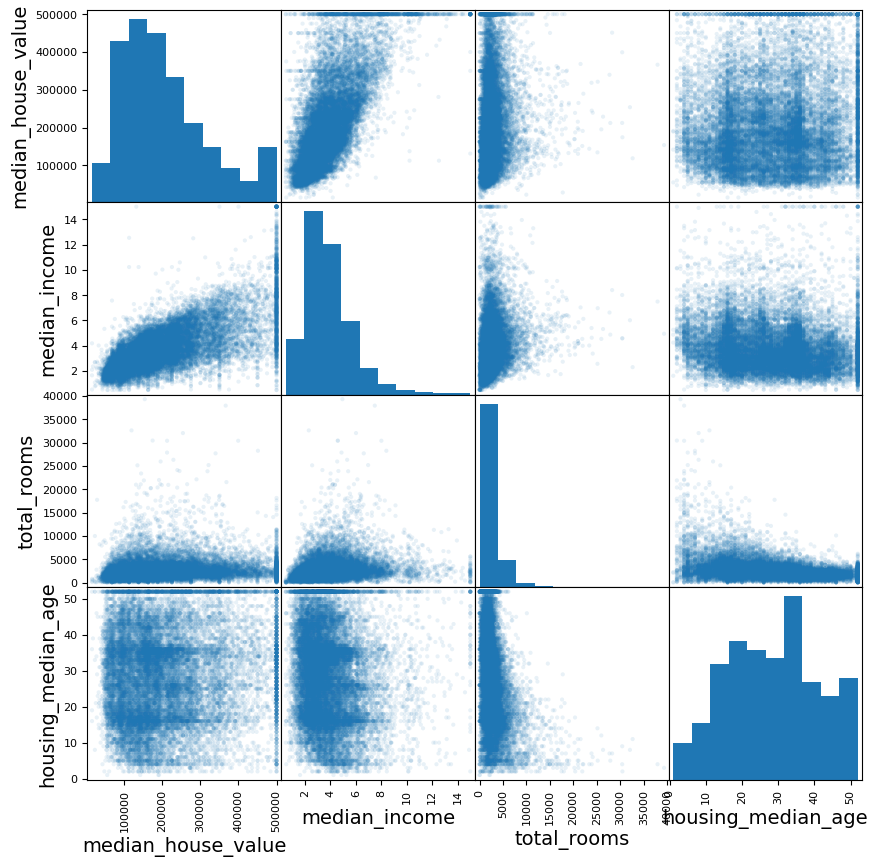

In [50]:
from pandas.plotting import scatter_matrix
attr = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attr],figsize=(10,10), alpha=0.1)

### for pred'ing the house prices, we need 2 imp attributes. 
1) median house value
2) median income

<Axes: xlabel='median_income', ylabel='median_house_value'>

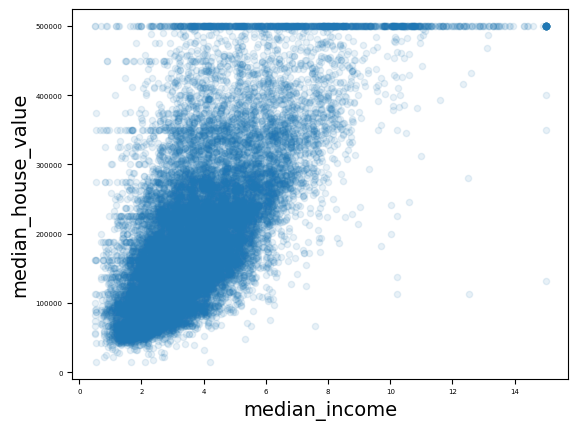

In [12]:
housing.plot(kind="scatter", x = "median_income", y="median_house_value",alpha=0.1)

## Combination of Attributes:

composing multiple attributes to create new ones, in this context we try to find the correlation for the new attributes.

In [13]:
for x in housing:
    print("\t \n", x)

	 
 longitude
	 
 latitude
	 
 housing_median_age
	 
 total_rooms
	 
 total_bedrooms
	 
 population
	 
 households
	 
 median_income
	 
 median_house_value
	 
 ocean_proximity


### constructed attributes:
- rooms per household = total rooms / number of households
- bedrooms per room = total bedrooms / total rooms
- population per household = population / households

In [14]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_rooms"] / housing["total_bedrooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [15]:
corr = housing.corr(numeric_only=True)

In [16]:
corr["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
bedrooms_per_room           0.383920
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
Name: median_house_value, dtype: float64

# Reset housing

In [23]:
housing = strat_train_set.drop("median_house_value",axis=1)

In [24]:
housing_labels = strat_train_set["median_house_value"].copy()

# Data Cleaning
#### we need to get rid of null values, to do so choose one of the three:
 - Get rid of an entire district when one of its attributes is invalid (0 or some buggy value)
 - Get rid of an entire attribute for all districts
 - modify to match the needs, 0 median or the mean (imp to save the value we set, otherwise the test data will be inconsistent)


### Using SKL
SimpleImputer , takes only numbers so we need to create a new instance of housing without nay strings

In [25]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [26]:
housing_nums = housing.drop("ocean_proximity",axis=1)

In [27]:
imputer.fit(housing_nums)

,"missing_values missing_values: int, float, str, np.nan, None or pandas.NA, default=np.nanThe placeholder for the missing values. All occurrences of`missing_values` will be imputed. For pandas' dataframes withnullable integer dtypes with missing values, `missing_values`can be set to either `np.nan` or `pd.NA`.",nan
,"strategy strategy: str or Callable, default='mean'The imputation strategy.- If ""mean"", then replace missing values using the mean along each column. Can only be used with numeric data.- If ""median"", then replace missing values using the median along each column. Can only be used with numeric data.- If ""most_frequent"", then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.- If ""constant"", then replace missing values with fill_value. Can be used with strings or numeric data.- If an instance of Callable, then replace missing values using the scalar statistic returned by running the callable over a dense 1d array containing non-missing values of each column... versionadded:: 0.20 strategy=""constant"" for fixed value imputation... versionadded:: 1.5 strategy=callable for custom value imputation.",'median'
,"fill_value fill_value: str or numerical value, default=NoneWhen strategy == ""constant"", `fill_value` is used to replace alloccurrences of missing_values. For string or object data types,`fill_value` must be a string.If `None`, `fill_value` will be 0 when imputing numericaldata and ""missing_value"" for strings or object data types.",None
,"copy copy: bool, default=TrueIf True, a copy of X will be created. If False, imputation willbe done in-place whenever possible. Note that, in the following cases,a new copy will always be made, even if `copy=False`:- If `X` is not an array of floating values;- If `X` is encoded as a CSR matrix;- If `add_indicator=True`.",True
,"add_indicator add_indicator: bool, default=FalseIf True, a :class:`MissingIndicator` transform will stack onto outputof the imputer's transform. This allows a predictive estimatorto account for missingness despite imputation. If a feature has nomissing values at fit/train time, the feature won't appear onthe missing indicator even if there are missing values attransform/test time.",False
,"keep_empty_features keep_empty_features: bool, default=FalseIf True, features that consist exclusively of missing values when`fit` is called are returned in results when `transform` is called.The imputed value is always `0` except when `strategy=""constant""`in which case `fill_value` will be used instead... versionadded:: 1.2",False


In [90]:
imputer.statistics_

array([-118.5   ,   34.26  ,   29.    , 2121.5   ,  433.5   , 1167.    ,
        408.    ,    3.5388,    3.    ])

In [ ]:
housing_nums.median()

In [98]:
housing.median(numeric_only=True)

longitude               -118.4900
latitude                  34.2600
housing_median_age        29.0000
total_rooms             2127.0000
total_bedrooms           435.0000
population              1166.0000
households               409.0000
median_income              3.5348
median_house_value    179700.0000
dtype: float64

In [99]:
X = imputer.transform(housing_nums)

In [103]:
X.shape

(15480, 9)

### Transforming text based attributes

In [107]:
housing_cat = housing[["ocean_proximity"]]

In [117]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)


In [123]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

#### here models may see 0,1,2,3,4 and think 0-4 are apart while they're similar
the fix:
#### binary based encoding, where its either close to the ocean (1) or not (0), seen as one hot encoder

In [136]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_one = cat_encoder.fit_transform(housing_cat)
housing_cat_one.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], shape=(20640, 5))

#### above we can see that all of it is enocded in either 1's or 0's making the model more clearer

*cat_encoder.categories_*


## CUSTOM TRANSFORMERS

##### we need to define custom transformers for custom attributes when needed, although sklearn has multiple we need to be able to write our own.
##### we need to write the fit,  transform, fit_transform functions in a special class. in order to avoid *args and **kwargs we add BaseEstimator as a base class including, TransformerMixin( this is to add the fit_transform, without needing to write it on our own )

# ####example use for the custom transformer using an sklearn transformer helper

from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_population = log_transformer.transform(housing["population"])
housing.head()

In [54]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix ,  population_ix , households_ix = 3,4,5,6
class CombinedAttributesAddr(BaseEstimator, TransformerMixin):
    def __init__ (self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room  = add_bedrooms_per_room
    def fit(self, X, y = None):
        return self # fit is to make a model understand smtn, since we dont have to peace.
    def transform(self, X, y = None):
        rooms_per_household = X[:, rooms_ix] / X[:,households_ix]
        population_per_household = X[:,population_ix] / X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household, population_per_household]

In [74]:
attr_addr = CombinedAttributesAddr(add_bedrooms_per_room=False)
housing_extra_attributes = attr_addr.transform(housing.values)
housing_extra_attributes.shape


(20640, 12)

In [73]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Feature Scaling
some features have huge values, while some are very small, total_rooms vs median_income, 
<br/>
models need these values to be in the same scale to perform well.
<br/>
in order to have all the features to have the same scale, we need to have all the attributes on the same scale.
<br/>
<br/>
Min-Max scaling (aka `Normalization`), ranges usually from 0-1, so all the attributes have similar scaled values. sklearn has a transformer for this, MinMaxScaler(feature_range --> tells what the max value needs to be)
<br/>
`Min-Max = value - minValue/maxValue - minValue`
<br/>
<br/>
Standardization : 
uses statistical approach, by subtracting the mean and dividing with the standard deviation.
therefore the mean of the resulting value will always be 0, and will have unit variance.
sklearn has, StandardScaler for this
<br/>
`StandardScaler = value - mean / standard deviation`
<br/>
<br/>
Standardization does not bound values to a specific value while being unaffected for outliers, but Normalizationd does, this is imp for gradient based algorithms. ex if median_income was 100, min-max would make 100 the maximum and the denominator would be huge making all other values become very small and identical (while being closer to 0).
<br/>
while Standardization will include negatives,0,and positive values, so the large outlier will be a valid number witho